# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [7]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [8]:
print(x.shape, y.shape)

(70000, 784) (70000,)


In [14]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(x.shape[1]) ]
df = pd.DataFrame(x,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [17]:
df['pixel0']=0.0
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


<Figure size 432x288 with 0 Axes>

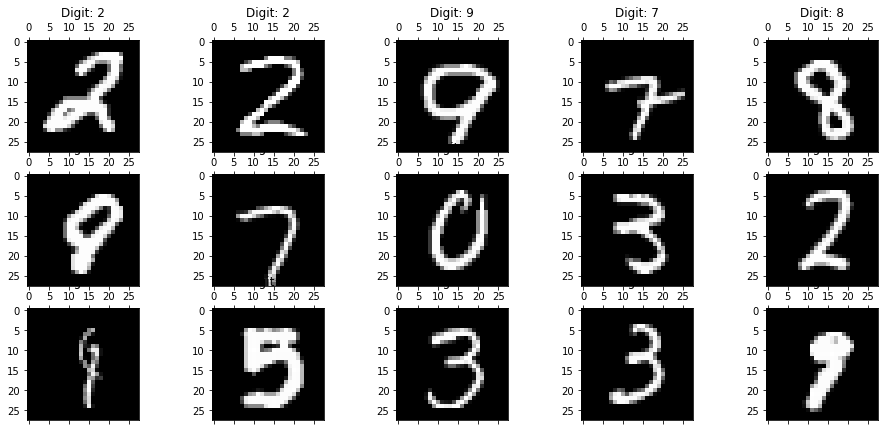

In [18]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [19]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


56000

In [21]:
from sklearn.decomposition import PCA
#기여율 사용
pca = PCA() #DEFAULT: 현재 있는 FEATURE 수
dr_X = pca.fit_transform(X_train)
pd.Series(np.cumsum(pca.explained_variance_ratio_))


0      0.097587
1      0.169141
2      0.230851
3      0.284799
4      0.333790
         ...   
779    1.000000
780    1.000000
781    1.000000
782    1.000000
783    1.000000
Length: 784, dtype: float64

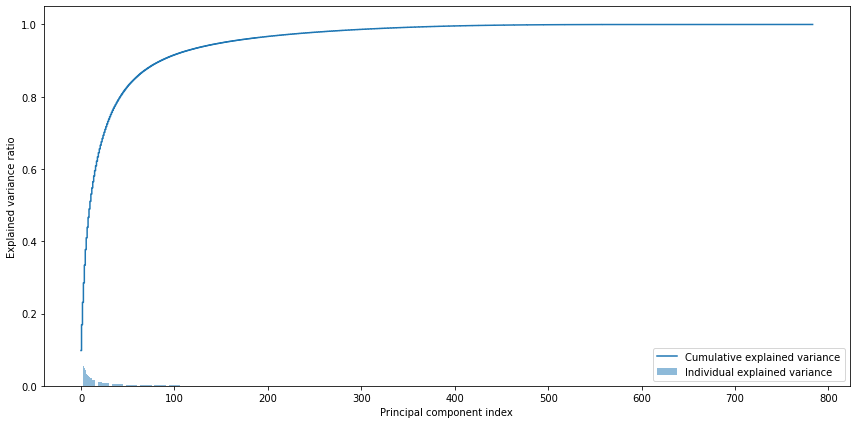

In [29]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [33]:
for i in range(len(cum_sum_eigenvalues)):
    if cum_sum_eigenvalues[i]>0.95:#95%을 설명하는 index given
        print(i)
        break

153


In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
x_lda = lda.fit_transform(X_train, np.ravel(y_train))


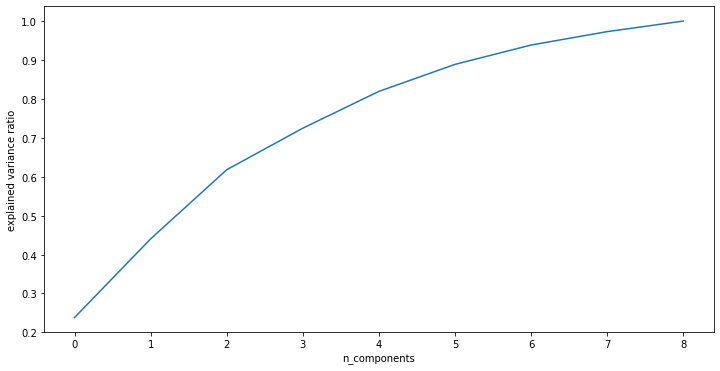

In [31]:
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('n_components')
plt.ylabel('explained variance ratio')
plt.show()

In [34]:
cum_sum_eigenvalues_lda = np.cumsum(lda.explained_variance_ratio_)
for i in range(len(cum_sum_eigenvalues_lda)):
    if cum_sum_eigenvalues_lda[i]>0.95:#95%을 설명하는 index break
        print(i)
        break

7


### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [35]:
!pip install xgboost


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score


Classification Task: comparing LogisticRegression and XGBoostClassifier

Use raw, pca, lda preprocessed data respectively

In [41]:
import time

lr = LogisticRegression(random_state=42)
start = time.time() # 시간 측정 시작
lr.fit(X_train, y_train)
preds_raw = lr.predict(X_test)
end = time.time() # 시간 측정 종료

print("Accuracy :", accuracy_score(y_test, preds_raw))
print("Time :", end-start)

Accuracy : 0.9178571428571428
Time : 32.63711881637573


In [42]:
pca = PCA(n_components = 153)#95% 이상을 설명하는 n_component 수
X_pca_train = pca.fit_transform(X_train)

# pca 변환
X_pca_test = pca.transform(X_test)

# 시간 측정, 모델 학습
lr = LogisticRegression(random_state=42)
start = time.time() # 시간 측정 시작
lr.fit(X_pca_train, y_train)
pred_pca = lr.predict(X_pca_test)
end = time.time()

print("Accuracy :", accuracy_score(y_test, pred_pca))
print("Time :", end-start)

Accuracy : 0.9148571428571428
Time : 14.101303815841675


In [44]:
lda = LinearDiscriminantAnalysis(n_components = 7)#95% 분산 설명
X_train_lda = lda.fit_transform(X_train, np.ravel(y_train))

# 테스트 데이터셋에 PCA 적용
X_test_lda = lda.transform(X_test)


lr = LogisticRegression(random_state=42)
start = time.time() # 시간 측정 시작

lr.fit(X_train_lda, np.ravel(y_train))
pred_lda = lr.predict(X_test_lda)
end = time.time()

print("Accuracy :", accuracy_score(y_test, pred_lda))
print("Time :", end-start)

Accuracy : 0.8651428571428571
Time : 4.595365047454834


XGBClassifier

In [46]:
import time
import xgboost as xgb
xgb = xgb.XGBClassifier(random_state=42)
start = time.time() # 시간 측정 시작
xgb.fit(X_train, y_train)
preds_raw = xgb.predict(X_test)
end = time.time() # 시간 측정 종료

print("Accuracy :", accuracy_score(y_test, preds_raw))
print("Time :", end-start)

[17:38:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.9780714285714286
Time : 569.811084985733


In [48]:
X_pca_train = pca.fit_transform(X_train)

# pca 변환
X_pca_test = pca.transform(X_test)
import xgboost as xgb

# 시간 측정, 모델 학습
xgb2 = xgb.XGBClassifier(random_state=42)
start = time.time() # 시간 측정 시작
xgb2.fit(X_pca_train, y_train)
pred_pca = xgb2.predict(X_pca_test)
end = time.time()

print("Accuracy :", accuracy_score(y_test, pred_pca))
print("Time :", end-start)


[17:49:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.9645
Time : 780.0351610183716


In [49]:
import xgboost as xgb

lda = LinearDiscriminantAnalysis(n_components = 7)#95% 분산 설명
X_train_lda = lda.fit_transform(X_train, np.ravel(y_train))

# 테스트 데이터셋에 PCA 적용
X_test_lda = lda.transform(X_test)


xgb3 = xgb.XGBClassifier(random_state=42)
start = time.time() # 시간 측정 시작

xgb3.fit(X_train_lda, np.ravel(y_train))
pred_lda = xgb3.predict(X_test_lda)
end = time.time()

print("Accuracy :", accuracy_score(y_test, pred_lda))
print("Time :", end-start)

[18:02:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.8880714285714286
Time : 51.407973289489746


특정한 틀 없이 자유롭게 해주시면 됩니다!